In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from PIL import Image
import numpy as np
import tqdm.auto

ImageType = Image.Image

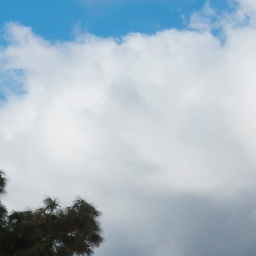

In [4]:
ref = Image.open("./sa_000000/sa_401.jpg")
x, y = 400, 400
ref = ref.crop((x, y, x + 256, y + 256))
ref

In [95]:
from segmentation.placement import to_mask


def get_distance(reference: ImageType, overlay: ImageType) -> float:
    reference = np.array(reference)
    overlay = np.array(overlay.convert("RGBA"))
    mask = to_mask(overlay)
    if mask.sum() > 0.5 * mask.size:
        return 1000
    return (
        (
            np.linalg.norm(
                reference[:, :, :3].flatten() - overlay[:, :, :3].flatten(), 1
            )
            * mask
        ).sum()
        / mask.sum()
        / (255 * 3)
    )

In [109]:
from PIL import ImageFilter


def detect_edges(image):
    new_image = Image.new("RGBA", image.size, "WHITE")
    new_image.paste(image, (0, 0), mask=image)
    new_image = new_image.convert("L").filter(ImageFilter.FIND_EDGES)
    # apply back the alpha mask
    new_image = new_image.convert("RGB")
    new_image.putalpha(image.getchannel(3))
    return new_image

0it [00:00, ?it/s]

193.86666666666667


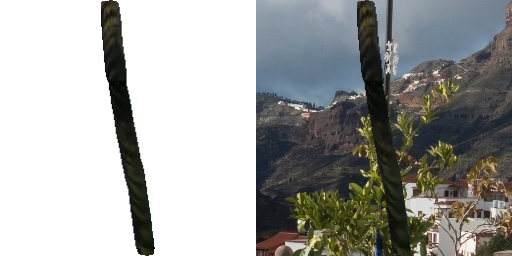

182.45882352941177


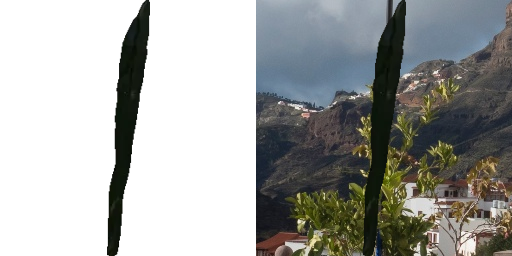

180.41176470588235


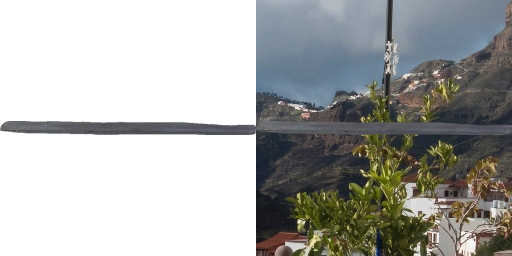

177.13725490196077


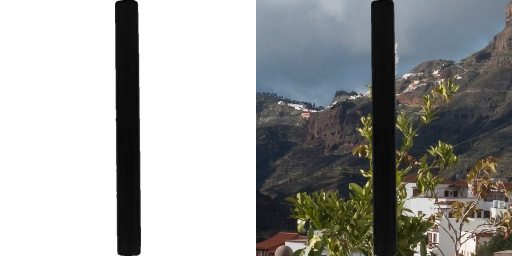

176.6705882352941


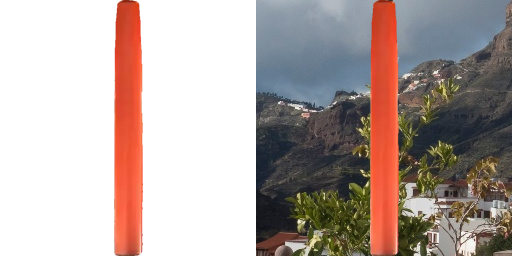

176.23921568627452


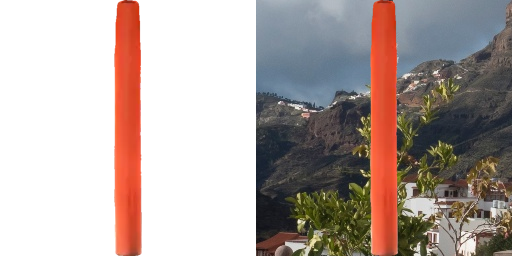

174.05490196078432


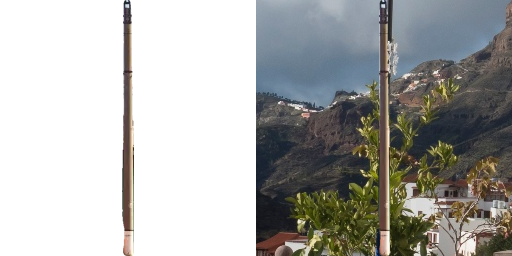

KeyboardInterrupt: 

In [122]:
from itertools import islice
from segmentation.loading import DATA_DIR, images_in_dir
from segmentation.visualization import show_comparison


best_distance = np.inf
reference_small = ref.resize((32, 32))

x = tqdm.auto.tqdm(islice(images_in_dir(DATA_DIR / "cutouts2"), None, 10000_000))
for path in x:
    image = Image.open(path)

    # distance = get_distance(ref, image)
    distance = get_distance(
        detect_edges(reference_small.convert("RGBA")),
        detect_edges(image.resize((32, 32))),
    )

    if distance < best_distance:
        best_distance = distance
        print(distance)

        display(show_comparison(image, ref.convert("RGBA"), alpha=1.0))

    # if similarity > best_similarity:
    #     best_similarity = similarity
    #     print(similarity)

    #     image.alpha_composite(reference_image_semi_transparent)
    #     if similarity > 0.8:
    #         display(image)

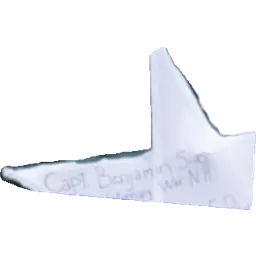

In [124]:
image = Image.open(
    "/Users/vaclav/prog/segmentation/data/cutouts2/sa_000021/00236126_00087.webp"
)
image = Image.open(
    "/Users/vaclav/prog/segmentation/data/cutouts2/sa_000020/00223833_00011.webp"
)
image

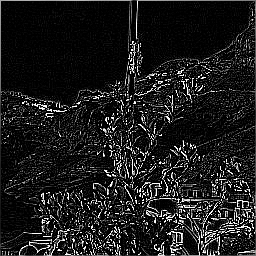

In [99]:
detect_edges(ref.convert("RGBA"))

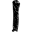

In [93]:
detect_edges(image.resize((32, 32)))

In [62]:
image = Image.open(path)

In [180]:
from segmentation.hash_index import HashIndex
from segmentation.shapes import get_edges_hash

hash_index = HashIndex(
    max_n_images=1000,
    hash_function=lambda image: get_edges_hash(image, size=8),
    cache_file=DATA_DIR / "cache" / "edges_hash.npy",
)

  0%|          | 0/1000 [00:00<?, ?it/s]

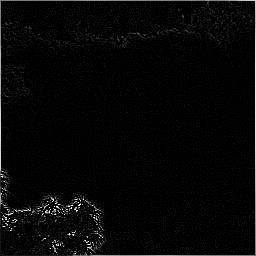

In [179]:
ref.convert("L").filter(ImageFilter.FIND_EDGES)

In [176]:
paths = list(islice(images_in_dir(DATA_DIR / "cutouts2"), 10000000))

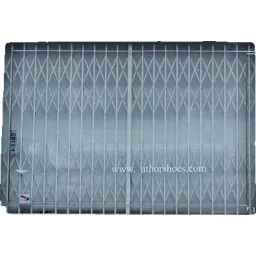

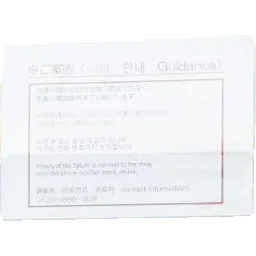

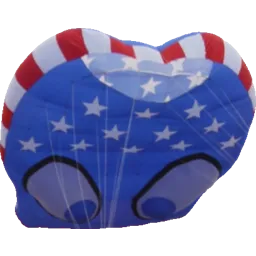

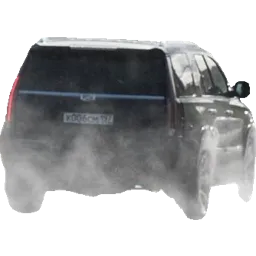

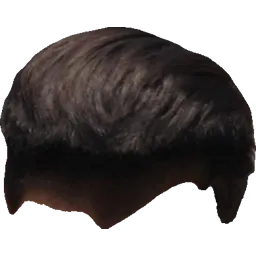

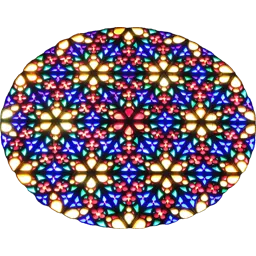

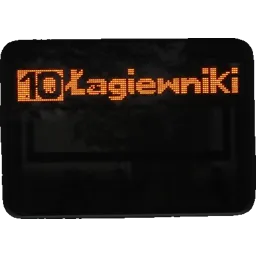

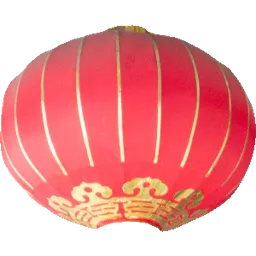

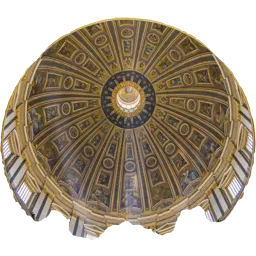

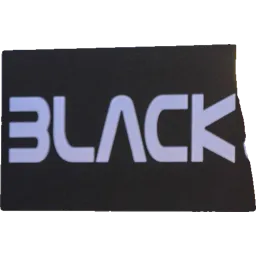

In [177]:
for closest in hash_index.get_closest(ref):
    display(Image.open(paths[closest]))

In [1]:
ref

NameError: name 'ref' is not defined